# Clustering Task
 - Divisive Clustering - KMeans Clustering

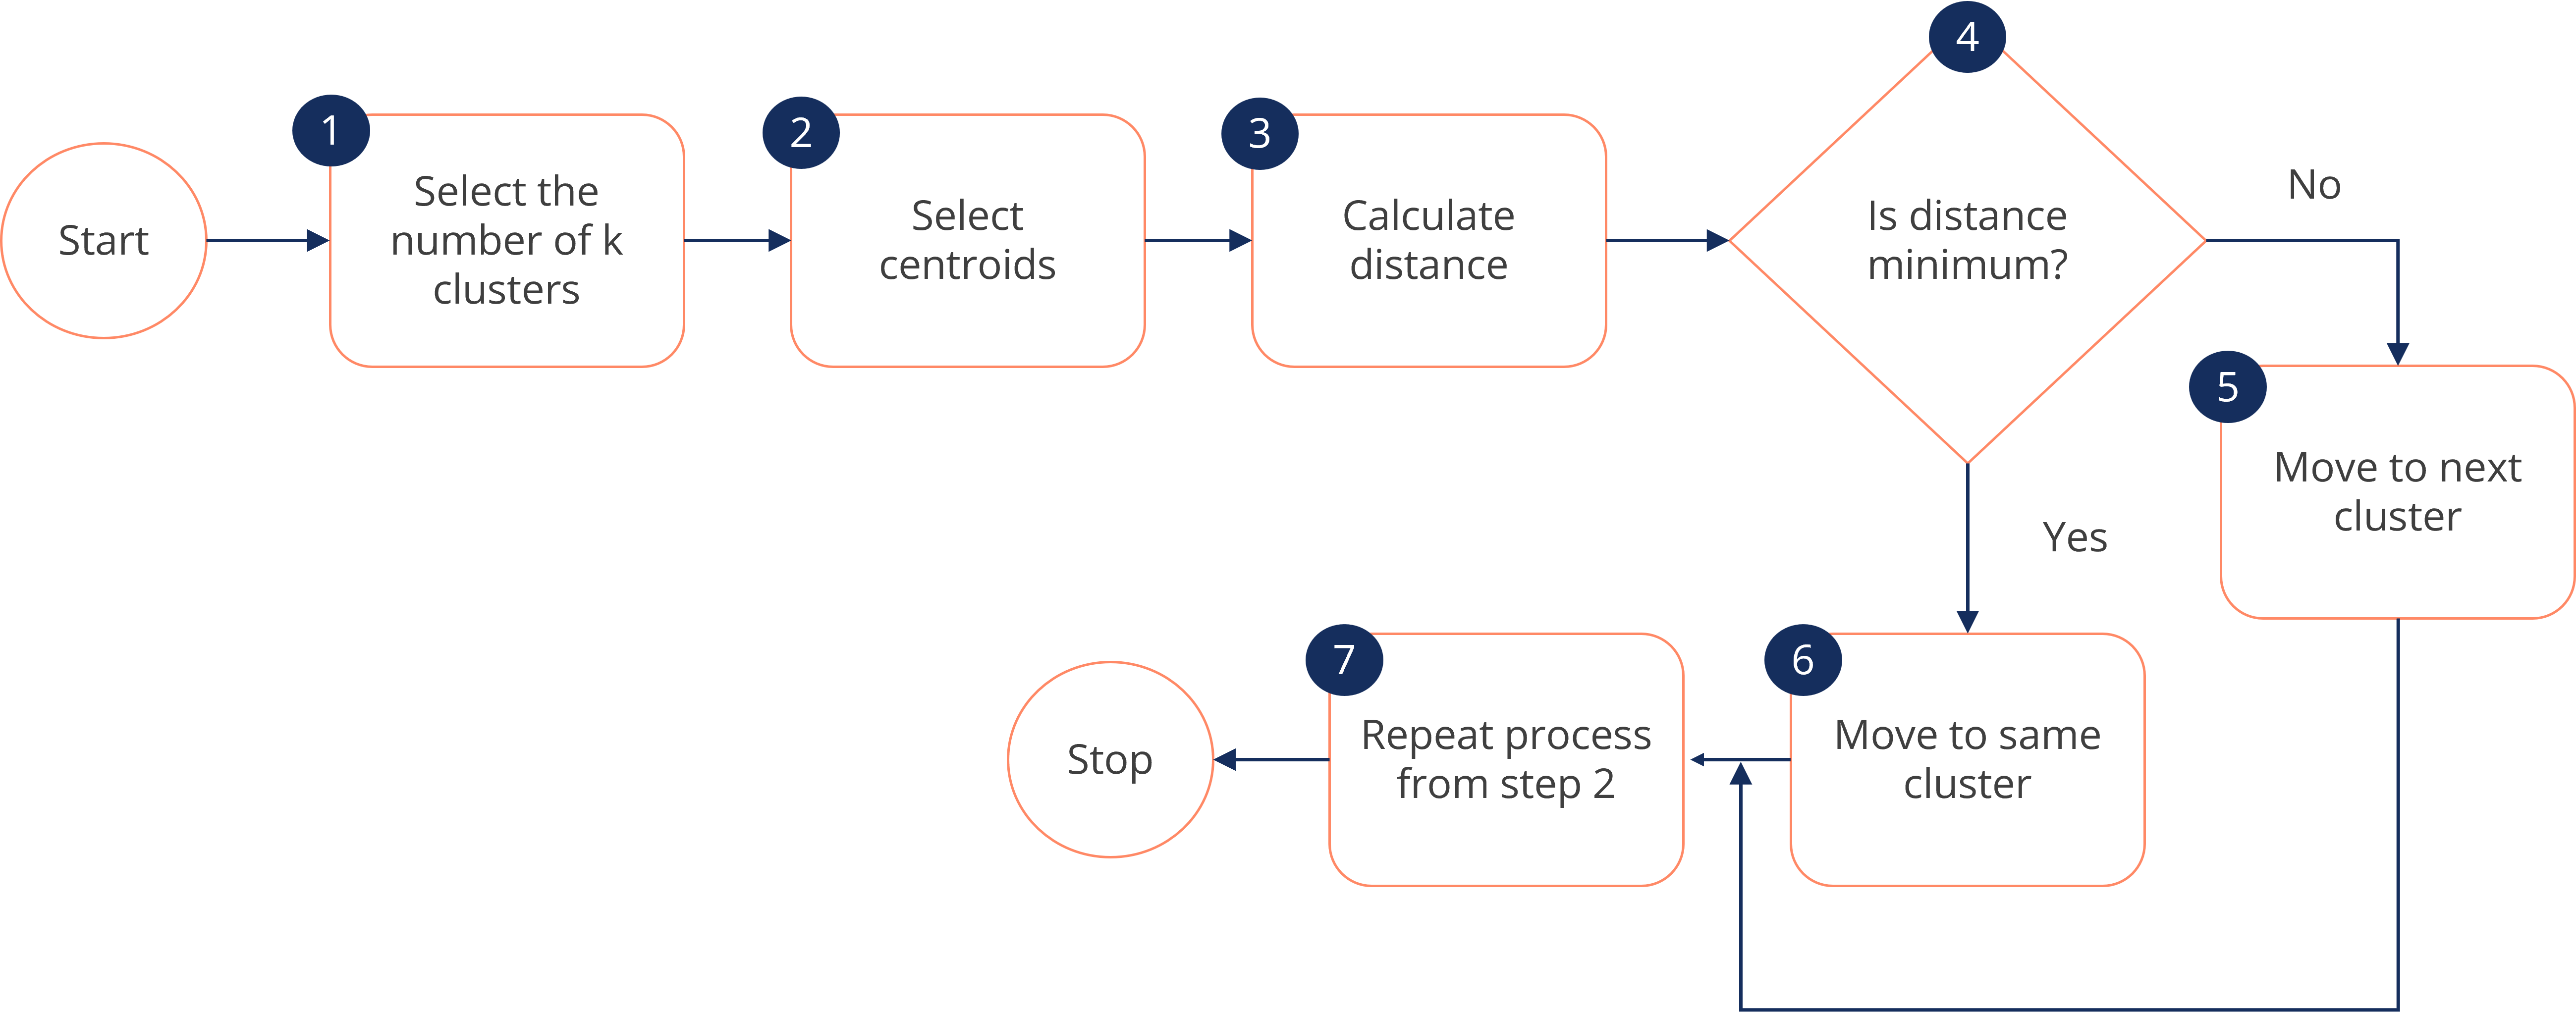

In [20]:
!wget https://raw.githubusercontent.com/SimplyLearner/Dataset/master/Mall_customers.csv

--2024-08-24 17:06:11--  https://raw.githubusercontent.com/SimplyLearner/Dataset/master/Mall_customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3779 (3.7K) [text/plain]
Saving to: ‘Mall_customers.csv.1’

Mall_customers.csv. 100%[===================>]   3.69K  --.-KB/s    in 0s      

2024-08-24 17:06:11 (46.0 MB/s) - ‘Mall_customers.csv.1’ saved [3779/3779]



In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
X = df[["Annual Income (k$)","Spending Score (1-100)" ]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

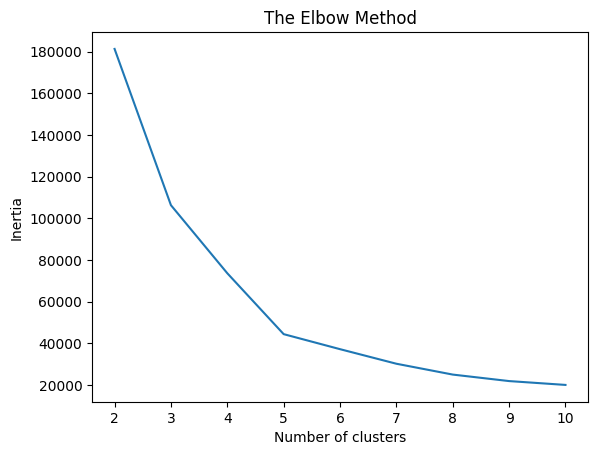

In [26]:
inertia = []
score = []

for i in range(2,11):
  kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(X.values)
  score.append(silhouette_score(X.values,kmeans.fit_predict(X.values)))
  inertia.append(kmeans.inertia_)

plt.plot(range(2,11),inertia)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

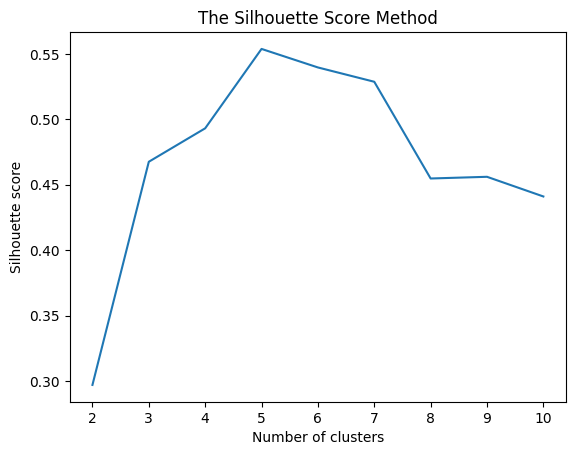

In [28]:
# plot for silhouette score

plt.plot(range(2,11),score)
plt.title("The Silhouette Score Method")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

In [29]:
model = KMeans(n_clusters=5)
y_pred = model.fit_predict(X.values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
df["cluster"] = y_pred

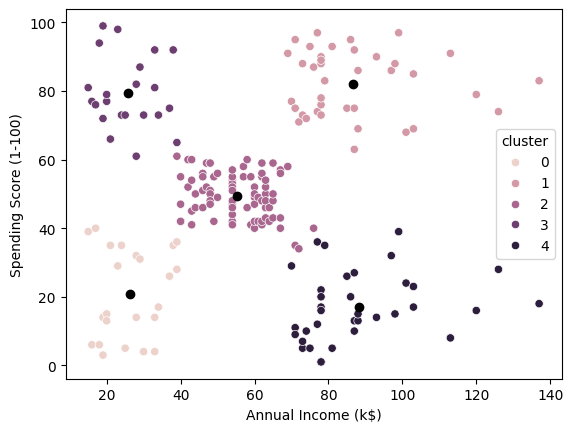

In [32]:
import seaborn as sns

sns.scatterplot(data=df,x="Annual Income (k$)",y="Spending Score (1-100)",hue="cluster")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color="black")
plt.show()